In [1]:
import pickle
import pandas as pd
import numpy as np
import cv2
import watermark
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [2]:
%load_ext watermark

In [3]:
%watermark --iversions

matplotlib: 3.4.3
pandas    : 1.3.4
watermark : 2.3.0
numpy     : 1.20.3
cv2       : 4.5.5



In [4]:
def process_image_blur(single_image_array, blur_type='g', kernel=(5,5), sigma_x=0, sigma_y=0):
    """Different Blurring Implementation for a single image
    
    Args:
    
        blur_type: Blur Type, valid values are:
            'g': Apply a Gaussian Filter
            'b': Apply a normalized Box Filter
        
        single_image_array: 2-D numpy.ndarray of image vector representing a gray-scale image.
    
        kernel: Filter Kernel tuple, valid tuple element values are positive, and odd. Default value is (5,5).
                ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be
                zero's and then they are computed from sigma.
    
        sigma_x: Gaussian kernel standard deviation in X direction. 
    
        sigma_y: Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal
                to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively.
    
    Returns:
        blurred_image_array: 2-D numpy.ndarray image array blurred with appropriate LPF.
    
    Reference: 
        https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
        
    """
    
    if blur_type == 'g':
        blurred_img_array = cv2.GaussianBlur(src=single_image_array, ksize=kernel, sigmaX=sigma_x, sigmaY=sigma_y)
    elif blur_type == 'b':
        blurred_img_array = cv2.blur(src=single_image_array, ksize=kernel)
    return blurred_img_array

def process_dataset_blur(image_dataset, blur_type='g', dimension=(150, 150), kernel=(5,5), sigma_x=0, sigma_y=0):
    """Different Blurring Implementation for a whole image dataset
    
    Args:
    
        blur_type: Blur Type, valid values are:
            'g': Apply a Gaussian Filter
            'b': Apply a normalized Box Filter
        
        image_dataset: dataframe of image vectors (each image is a flattened row in the dataframe)
        
        dimension: Dimension tuple of each image. This is assumed that prior to calling blurring, image dataset is 
                standardized to a uniform dimension. Default dimension is (150,150)
            
        kernel: Filter Kernel tuple, valid tuple element values are positive, and odd. Default value is (5,5).
                ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be
                zero's and then they are computed from sigma.
    
        sigma_x: Gaussian kernel standard deviation in X direction. 
    
        sigma_y: Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal
                to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively.
    
    Returns:
        blurred_image_dataframe: a Dataframe of blurred images, where each row is a flattened 2-D numpy.ndarray 
            containing a single image.
    
    Reference: 
        https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
        
    """
    smoothed_images = image_dataset.copy()
    for num in range(len(smoothed_images)):
        back_to_2d_image = smoothed_images.iloc[num].to_numpy().reshape(dimension)                         
        smoothed_images.iloc[num] = process_image_blur(back_to_2d_image, blur_type, kernel=kernel, sigma_x=sigma_x, sigma_y=sigma_y).flatten()
    return smoothed_images




In [5]:
%%time
brain_scans = pickle.load(open('Amit/Labeled Data/labeled_data.pkl','rb'))


CPU times: user 4.52 ms, sys: 593 ms, total: 597 ms
Wall time: 605 ms


In [6]:
# v_kernel = (3, 3)
# v_kernel = (5, 5)
v_kernel = (7, 7)
# v_kernel = (11, 11)

v_dimension = (150, 150)

img_index = 1

v_sigma_x = 0; v_sigma_y = 0



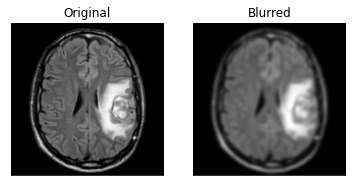

CPU times: user 90.4 ms, sys: 5.29 ms, total: 95.7 ms
Wall time: 103 ms


In [7]:
%%time
# Gaussian Blur: Example for One Image

original_img = brain_scans.iloc[1,:-1].to_numpy().reshape(v_dimension)
blurred_img = process_image_blur(original_img, blur_type='g', kernel=v_kernel, sigma_x=v_sigma_x, sigma_y=v_sigma_y)
plt.subplot(121),plt.imshow(original_img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_img, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
%%time
# Gaussian Blur: Whole Dataset 
blurred_brain_scans_minus_label = process_dataset_blur(brain_scans.iloc[:,:-1], blur_type='g', dimension=v_dimension, kernel=v_kernel, sigma_x=v_sigma_x, sigma_y=v_sigma_y)





CPU times: user 5.1 s, sys: 323 ms, total: 5.42 s
Wall time: 5.63 s


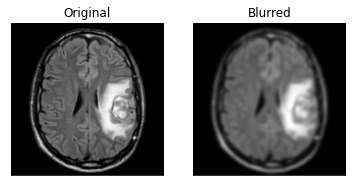

In [9]:
original_img = brain_scans.iloc[img_index,:-1].to_numpy().reshape(v_dimension)
blurred_img = blurred_brain_scans_minus_label.iloc[img_index].to_numpy().reshape(v_dimension)
plt.subplot(121),plt.imshow(original_img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_img, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

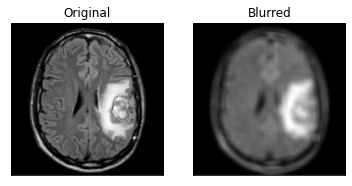

In [10]:
# Normalized Box Blur: Example for One Image

original_img = brain_scans.iloc[1,:-1].to_numpy().reshape(v_dimension)
blurred_img = process_image_blur(original_img, blur_type='b', kernel=v_kernel, sigma_x=v_sigma_x, sigma_y=v_sigma_y)
plt.subplot(121),plt.imshow(original_img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_img, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
%%time
# Normalized Box Blur: Whole Dataset 
normalized_blurred_brain_scans_minus_label = process_dataset_blur(brain_scans.iloc[:,:-1], blur_type='b', dimension=v_dimension, kernel=v_kernel, sigma_x=v_sigma_x, sigma_y=v_sigma_y)



CPU times: user 5.32 s, sys: 362 ms, total: 5.68 s
Wall time: 6.37 s


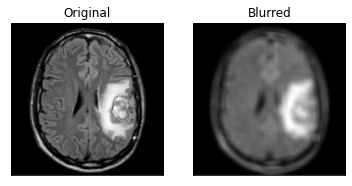

In [12]:

original_img = brain_scans.iloc[img_index,:-1].to_numpy().reshape(v_dimension)
blurred_img = normalized_blurred_brain_scans_minus_label.iloc[img_index].to_numpy().reshape(v_dimension)
plt.subplot(121),plt.imshow(original_img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_img, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()
